# Matplotlib

In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [175]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

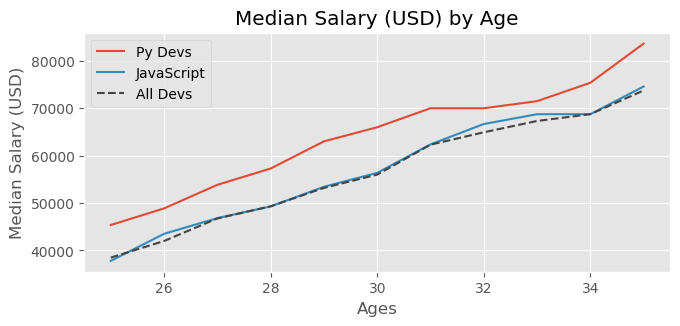

In [176]:
# First plot

# print(plt.style.available) Takes a look at all available styles fivethirtyeight and seaborn are cool


# resets formating
plt.rcdefaults()

# for style use
plt.style.use('ggplot')

# for a funny one plt.xkcd()

ages_x = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]

# Median Python Developer Salaries by Age
#py_dev_x = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35] -- We have the same ages so we need only one
py_dev_y = [45372, 48876, 53850, 57287, 63016,
            65998, 70003, 70000, 71496, 75370, 83640]
plt.plot(ages_x, py_dev_y, label = 'Py Devs')

# Median JavaScript Developer Salaries by Age
js_dev_y = [37810, 43515, 46823, 49293, 53437,
            56373, 62375, 66674, 68745, 68746, 74583]
plt.plot(ages_x, js_dev_y, label = 'JavaScript')

# Median Developer Salaries by Age
dev_y = [38496, 42000, 46752, 49320, 53200,
         56000, 62316, 64928, 67317, 68748, 73752]
plt.plot(ages_x, dev_y, color = '#444444', linestyle = '--', label = 'All Devs')

plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.title('Median Salary (USD) by Age')

plt.legend(loc="upper left")

plt.tight_layout()
plt.gcf().set_size_inches(7, 3) # To adjust size
plt.show()

# Bar Charts & CSV Data

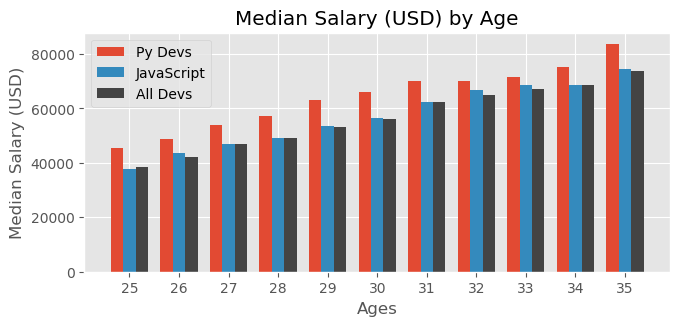

In [177]:
plt.style.use('ggplot')

import numpy as np

ages_x = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]

x_indexes = np.arange(len(ages_x))
width = 0.25

plt.bar(x_indexes - width, py_dev_y, width = width, label = 'Py Devs')

plt.bar(x_indexes, js_dev_y, width = width, label = 'JavaScript')

plt.bar(x_indexes + width, dev_y, width = width, color = '#444444', linestyle = '--', label = 'All Devs')

plt.xticks(ticks = x_indexes, labels = ages_x)

plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')
plt.title('Median Salary (USD) by Age')

plt.legend(loc="upper left")

plt.tight_layout()

plt.gcf().set_size_inches(7, 3)
plt.show()

In [115]:
# look at current directory being used need to consider this when importing files
import os
cwd = os.getcwd()
print(cwd)

C:\Users\Craig.Hinman\Python Lessons\corey_schafer_lessons


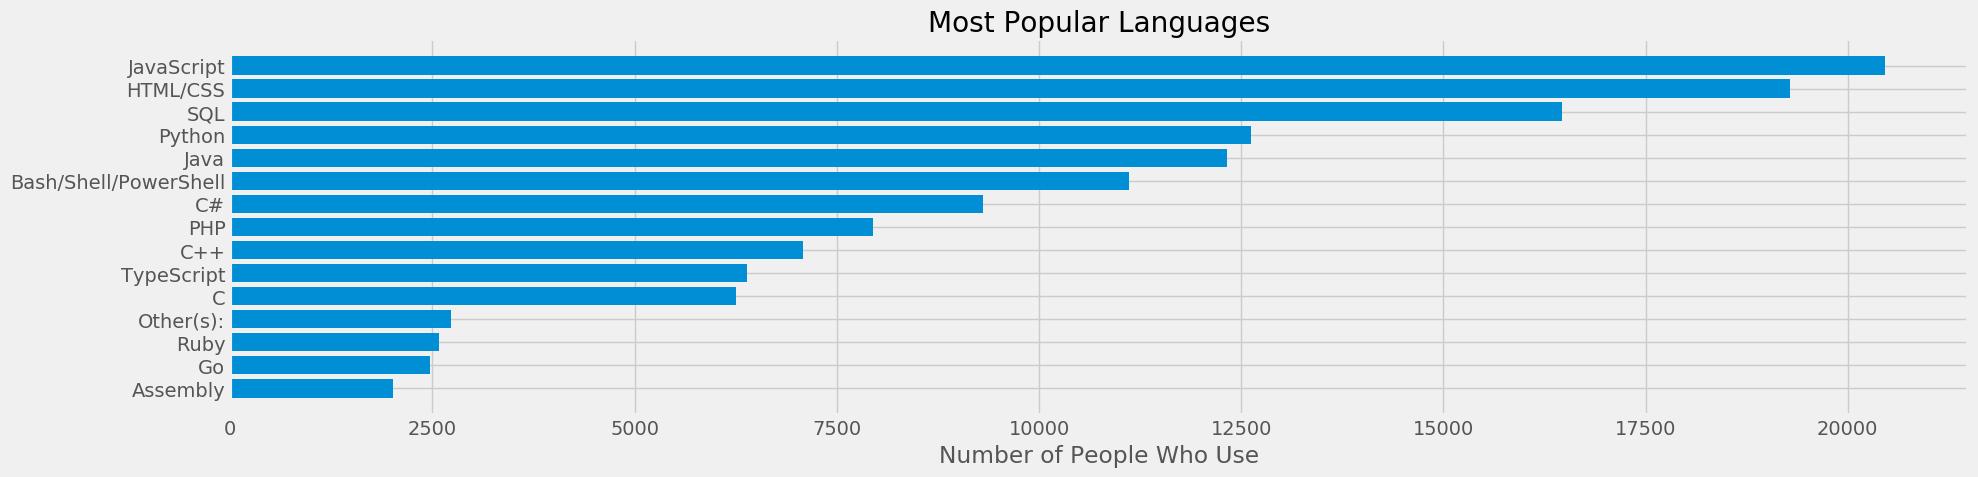

In [218]:
import csv
import numpy as np
import pandas as pd
from collections import Counter
from matplotlib import pyplot as plt

plt.style.use("fivethirtyeight")

data = pd.read_csv('bar_chart_data.csv')
data = data["Responder_id,LanguagesWorkedWith"].str.split(",", n = 1, expand = True)
data.columns = ['Responder_id', 'LanguagesWorkedWith']
        
ids = data['Responder_id']
lang_responses = data['LanguagesWorkedWith']

language_counter = Counter()

for response in lang_responses:
    language_counter.update(response.split(';'))

languages = []
popularity = []

for item in language_counter.most_common(15):
    languages.append(item[0])
    popularity.append(item[1])

languages.reverse()
popularity.reverse()

plt.barh(languages, popularity)

plt.title("Most Popular Languages")
# plt.ylabel("Programming Languages")
plt.xlabel("Number of People Who Use")

plt.rcParams["figure.figsize"] = (15,5)
plt.tight_layout()

plt.show()

# Pie Charts

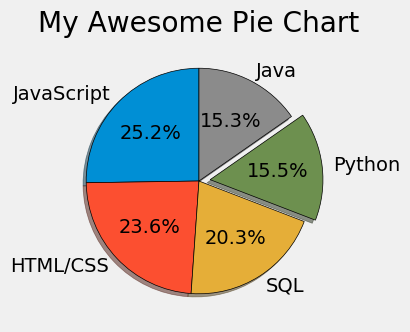

In [250]:
# Basic Pie Chart
plt.style.use('fivethirtyeight')

slices = [59219, 55466, 47544, 36443, 35917]
labels = ['JavaScript', 'HTML/CSS', 'SQL', 'Python', 'Java']
explode = [0, 0, 0, 0.1, 0]

plt.pie(slices, labels = labels, explode = explode, startangle = 90, shadow = True,
        autopct = '%1.1f%%', # Adds the percent labels
        wedgeprops = {'edgecolor': 'black'})

plt.title('My Awesome Pie Chart')
# plt.rcParams["figure.figsize"] = (5,5)
plt.gcf().set_size_inches(4, 4)
plt.tight_layout()
plt.show()

# Stack Plots

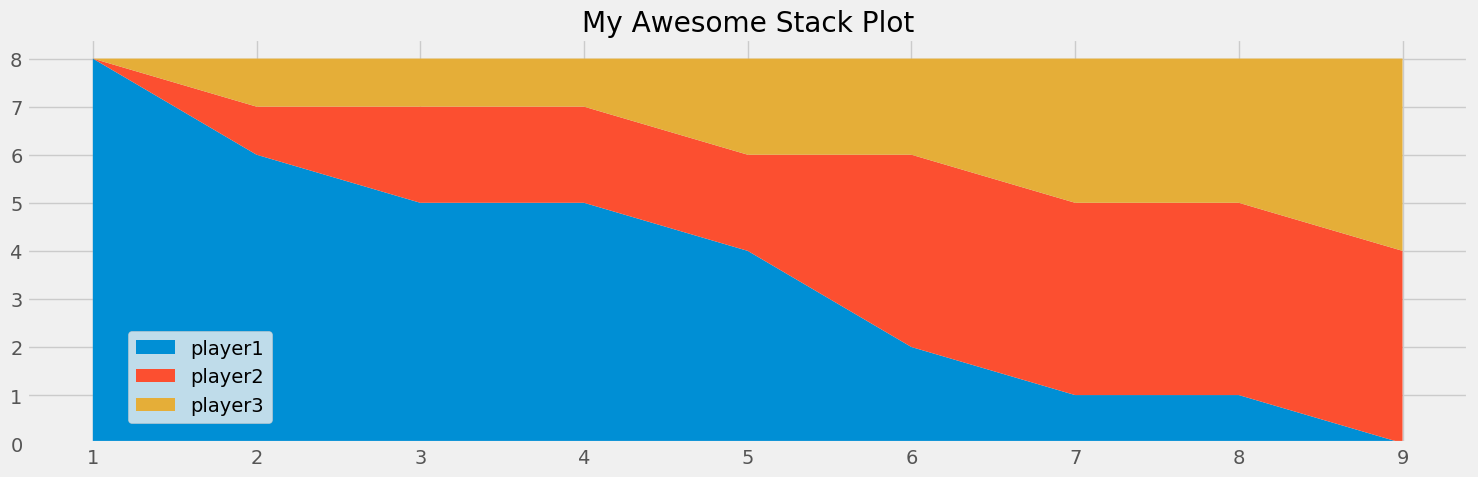

In [260]:
from matplotlib import pyplot as plt

plt.style.use("fivethirtyeight")


minutes = [1, 2, 3, 4, 5, 6, 7, 8, 9]

player1 = [8, 6, 5, 5, 4, 2, 1, 1, 0]
player2 = [0, 1, 2, 2, 2, 4, 4, 4, 4]
player3 = [0, 1, 1, 1, 2, 2, 3, 3, 4]

labels = ['player1', 'player2', 'player3']

plt.stackplot(minutes, player1, player2, player3, labels = labels)

plt.legend(loc = (0.07, 0.05))

plt.title("My Awesome Stack Plot")
plt.gcf().set_size_inches(15, 5)
plt.tight_layout()
plt.show()

# Colors:
# Blue = #008fd5
# Red = #fc4f30
# Yellow = #e5ae37
# Green = #6d904f

# Cool Area Plot

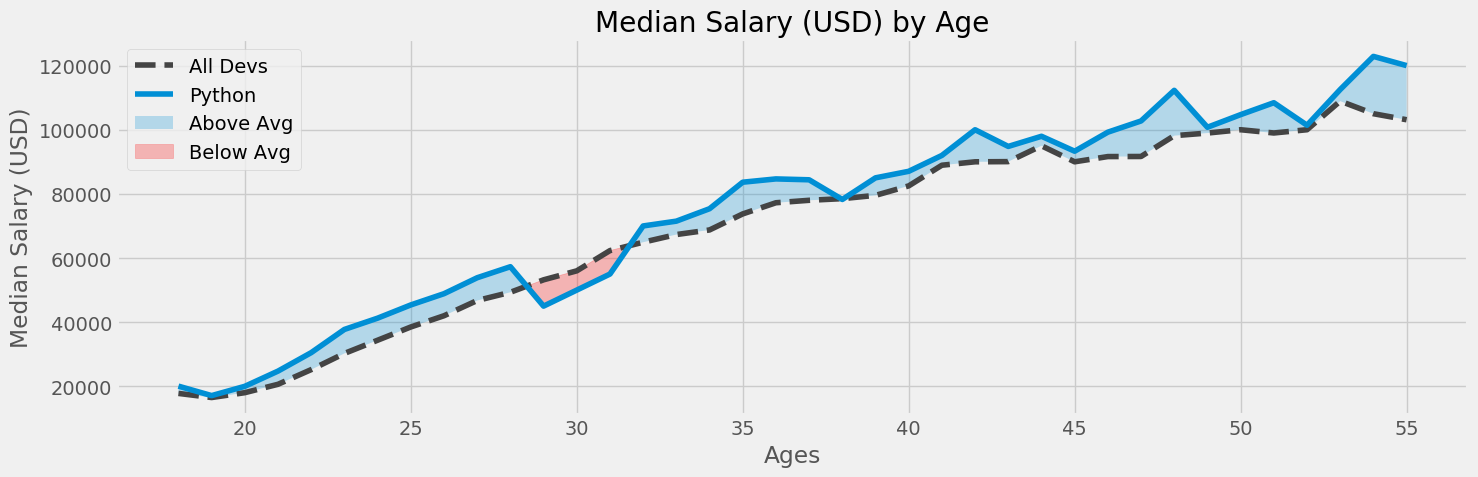

In [277]:
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('filling_lesson_data.csv')
ages = data['Age']
dev_salaries = data['All_Devs']
py_salaries = data['Python']
js_salaries = data['JavaScript']

plt.plot(ages, dev_salaries, color='#444444',
         linestyle='--', label='All Devs')

plt.plot(ages, py_salaries, label='Python')

overall_median = 57287 # Can base the fill off of the median

plt.fill_between(ages, py_salaries, dev_salaries,
                 where = (py_salaries > dev_salaries),
                 interpolate = True, alpha = 0.25, label = 'Above Avg') # Interpolate cleans up clipping that can happen (makes it clean)

plt.fill_between(ages, py_salaries, dev_salaries,
                 where = (py_salaries <= dev_salaries),
                 interpolate = True, color = 'red', alpha = 0.25, label = 'Below Avg')

plt.legend()

plt.title('Median Salary (USD) by Age')
plt.xlabel('Ages')
plt.ylabel('Median Salary (USD)')

plt.gcf().set_size_inches(15, 5)
plt.tight_layout()

plt.show()

# Histograms

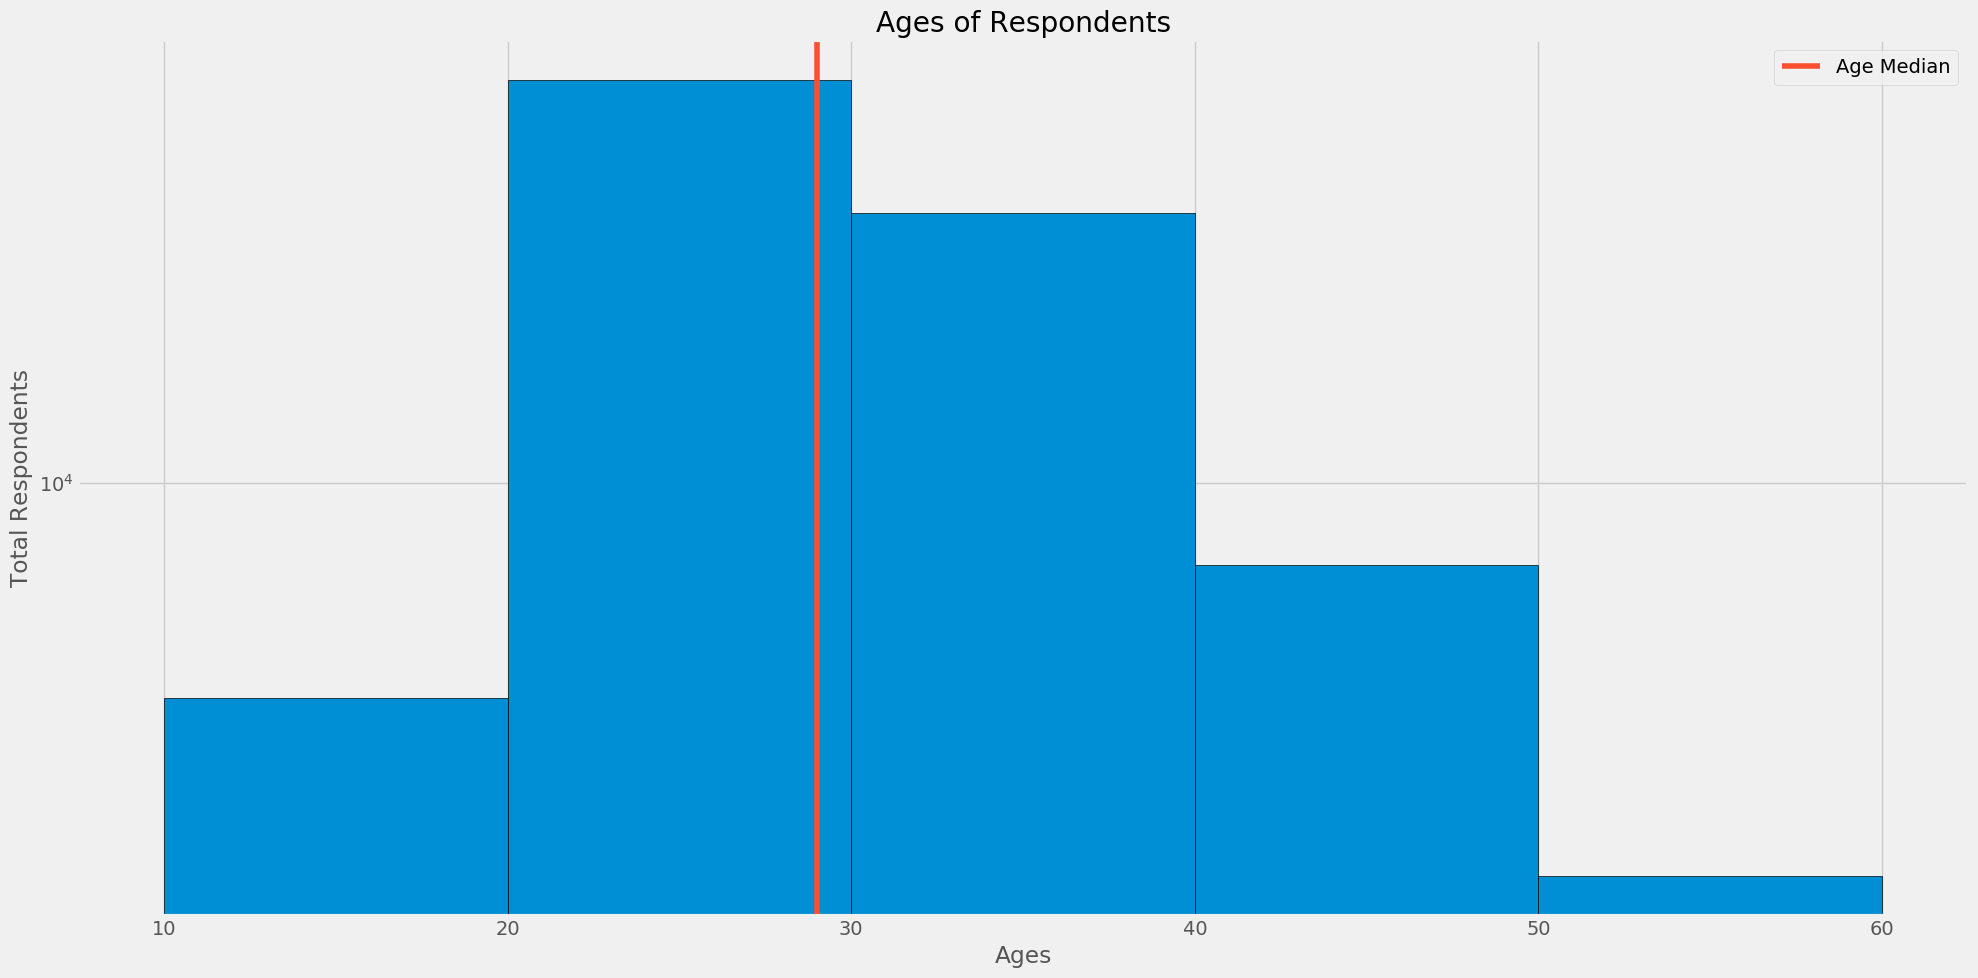

In [291]:
import pandas as pd
from matplotlib import pyplot as plt

plt.style.use('fivethirtyeight')

data = pd.read_csv('histogram_lesson_data.csv')
ids = data['Responder_id']
ages = data['Age']

bins = [10, 20, 30, 40, 50, 60]

plt.hist(ages, bins = bins, edgecolor = 'black', log = True)

median_age = 29
color = '#fc4f30'

plt.axvline(median_age, color = '#fc4f30', label = 'Age Median')

plt.legend()

plt.title('Ages of Respondents')
plt.xlabel('Ages')
plt.ylabel('Total Respondents')

plt.gcf().set_size_inches(20, 10)
plt.tight_layout()

plt.show()

# Scatterplots

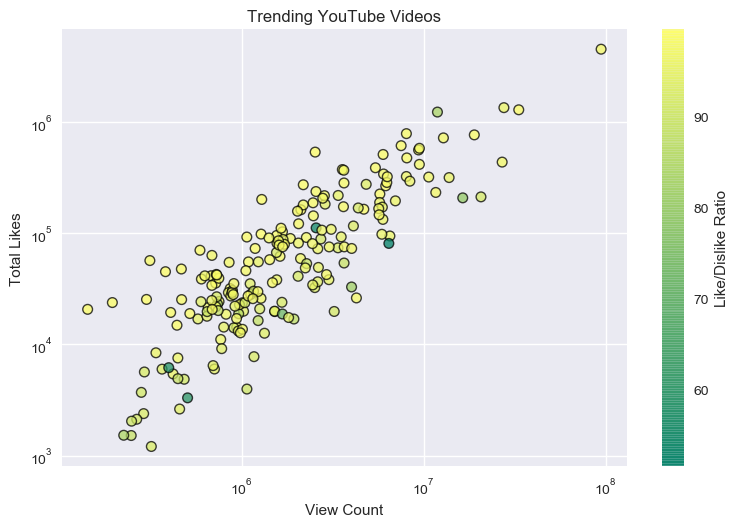

In [311]:
import pandas as pd
from matplotlib import pyplot as plt

plt.style.use('seaborn')

data = pd.read_csv('2019-05-31-data_scatterplt_lesson.csv')
view_count = data['view_count']
likes = data['likes']
ratio = data['ratio']

plt.scatter(view_count, likes, c = ratio, cmap = 'summer',
            edgecolor = 'black', linewidth = 1, alpha = 0.75)

cbar = plt.colorbar()
cbar.set_label('Like/Dislike Ratio')

plt.xscale('log') # To make the graph less affected by outliers
plt.yscale('log')

plt.title('Trending YouTube Videos')
plt.xlabel('View Count')
plt.ylabel('Total Likes')

plt.tight_layout()

plt.show()

# Timeseries

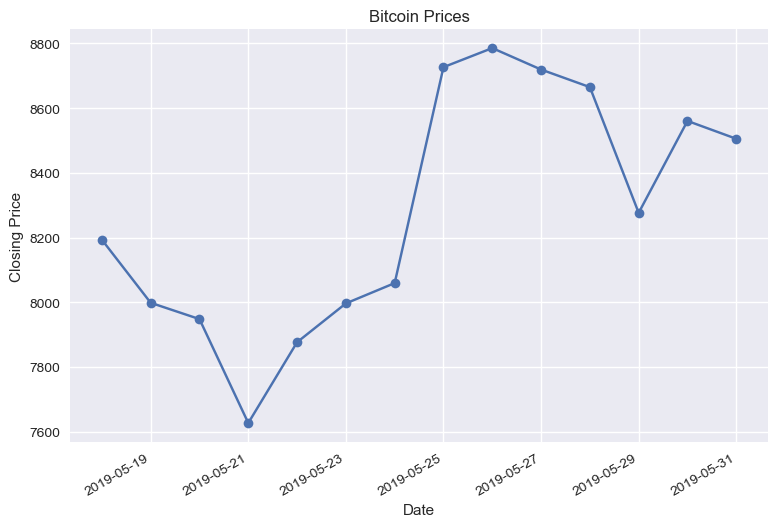

In [320]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates

plt.style.use('seaborn')

data = pd.read_csv('time_series_lesson_data.csv')

data['Date'] = pd.to_datetime(data['Date']) # Converting strings to date types
data.sort_values('Date', inplace = True) # Need to sort the new date values now (inplace skips a step like += does)

price_date = data['Date']
price_close = data['Close']

plt.plot_date(price_date, price_close, linestyle = 'solid')

plt.gcf().autofmt_xdate() # Makes axis easier to read

plt.title('Bitcoin Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')

plt.tight_layout()

plt.show()

# Changing format from YYYY-MM-DD to Month-Day-Year
# date_format = mpl_dates.DateFormatter('%b %d, %Y')
# plt.gca().xaxis.set_major_formatter(date_format)

# Plotting Live Data in Real-Time

In [4]:
# Continuous data generator (makes a csv that is used for plotting later)
import csv
import random
import time

x_value = 0
total_1 = 1000
total_2 = 1000

fieldnames = ["x_value", "total_1", "total_2"]


with open('live_data.csv', 'w') as csv_file:
    csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    csv_writer.writeheader()

while True:

    with open('live_data.csv', 'a') as csv_file:
        csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

        info = {
            "x_value": x_value,
            "total_1": total_1,
            "total_2": total_2
        }

        csv_writer.writerow(info)
        print(x_value, total_1, total_2)

        x_value += 1
        total_1 = total_1 + random.randint(-6, 8)
        total_2 = total_2 + random.randint(-5, 6)

    time.sleep(1)

0 1000 1000
1 998 1001
2 1004 1006
3 1005 1007
4 1006 1007
5 1006 1011
6 1005 1012
7 1009 1018
8 1017 1017
9 1021 1020
10 1028 1017
11 1027 1022
12 1030 1017
13 1024 1012
14 1032 1012
15 1040 1013
16 1043 1017
17 1037 1022
18 1036 1019
19 1042 1017
20 1041 1022
21 1037 1017
22 1042 1014
23 1039 1016
24 1033 1012
25 1041 1016
26 1048 1011
27 1048 1010
28 1055 1010
29 1059 1011
30 1057 1007
31 1061 1009
32 1055 1007
33 1051 1006
34 1057 1005
35 1065 1002
36 1068 997
37 1072 994
38 1079 994
39 1083 999
40 1090 997
41 1092 996
42 1094 999


KeyboardInterrupt: 

Traceback (most recent call last):
  File "C:\Users\Craig.Hinman\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 216, in process
    func(*args, **kwargs)
  File "C:\Users\Craig.Hinman\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


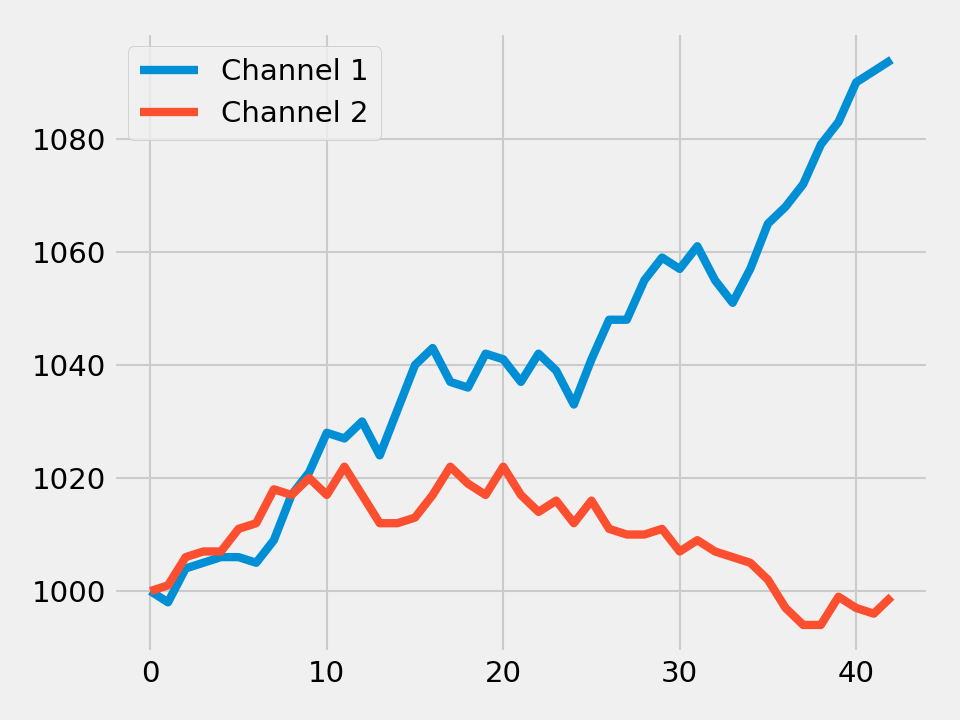

In [5]:
%matplotlib notebook
import random
from itertools import count
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

plt.style.use('fivethirtyeight')

x_vals = []
y_vals = []

index = count() # Count adds up sequentially 1,2,3....

def animate(i):
    data = pd.read_csv('live_data.csv')
    #%run -i 'data_gen.py'
    x = data['x_value']
    y1 = data['total_1']
    y2 = data['total_2']
    
    plt.cla() # need this to clear out old lines that are clashing with the new lines
    
    plt.plot(x, y1, label = 'Channel 1')
    plt.plot(x, y2, label = 'Channel 2')
    
    # need this because it will be cleared out each iteration because of plt.cla() want to specify
    # location because with live data the function will try and pick the best spot so the legend can move around
    plt.legend(loc = 'upper left') 
    plt.tight_layout()

# GCF is get current figure, we want to animate the function, takes milliseconds so 1000ms = 1 second
ani = FuncAnimation(plt.gcf(), animate, interval = 1000)
    
plt.tight_layout()
plt.show()

# Subplots

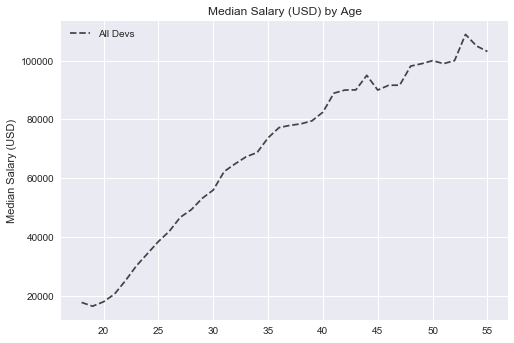

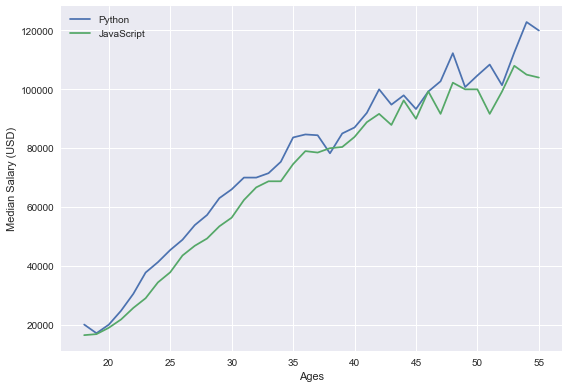

In [26]:
# Useful if you want to plot several plots at once

%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt

plt.style.use('seaborn')

data = pd.read_csv('subplots_data.csv')
ages = data['Age']
dev_salaries = data['All_Devs']
py_salaries = data['Python']
js_salaries = data['JavaScript']

fig1, ax1 = plt.subplots() # Getting two plots
fig2, ax2 = plt.subplots()

ax1.plot(ages, dev_salaries, color='#444444',
         linestyle='--', label='All Devs')

ax2.plot(ages, py_salaries, label='Python')
ax2.plot(ages, js_salaries, label='JavaScript')

ax1.legend()
ax1.set_title('Median Salary (USD) by Age')
ax1.set_ylabel('Median Salary (USD)')

ax2.legend()
ax2.set_xlabel('Ages')
ax2.set_ylabel('Median Salary (USD)')

#plt.gcf().set_size_inches(7, 5)
plt.tight_layout()

plt.show()

# Useful to save the figs you make with:
# fig1.save('fig1.png')
# fig2.save('fig2.png')